In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
dataset=pd.read_csv('pulserate.csv')
name=dataset['Name'].tolist()
age=dataset['Age'].tolist()
dosage=dataset['Dosage(in %age)'].tolist()
pr1=dataset['Pulserate1(Delta)'].tolist()
pr2=dataset['Pulserate2(Delta)'].tolist()
pr3=dataset['Pulserate3(Delta)'].tolist()

In [14]:
def view():
    data1={'Name':name,'Age':age,'Dosage(in %age)':dosage,'Pulserate1':pr1,'Pulserate2':pr2,'Pulserate3':pr3}
    df = pd.DataFrame(data1)
    print("\n",df)
def square(list):
    return [i**2 for i in list]
def prod(list1,list2):
    return[list1[i]*list2[i] for i in list1]
def hists1():
    pr1=dataset['Pulserate1(Delta)'].tolist()
    plt.figure(figsize = (20,5))
    plt.title("Sample 1 PulseRate(Delta) V/S Count")
    plt.xlabel('PulseRate(Delta)')
    plt.ylabel('Count')
    plt.hist(pr1,bins=[x for x in range(0,21)],color='darkviolet', edgecolor='black')
def hists2():
    pr2=dataset['Pulserate2(Delta)'].tolist()
    plt.figure(figsize = (20,5))
    plt.title("Sample 2 PulseRate(Delta) V/S Count")
    plt.xlabel('PulseRate(Delta)')
    plt.ylabel('Count')
    plt.hist(pr2,bins=[x for x in range(0,21)],color='darkorange', edgecolor='black')
def hists3():
    pr3=dataset['Pulserate3(Delta)'].tolist()
    plt.figure(figsize = (20,5))
    plt.title("Sample 3 PulseRate(Delta) V/S Count")
    plt.xlabel('PulseRate(Delta)')
    plt.ylabel('Count')
    plt.hist(pr3,bins=[x for x in range(0,21)],color='red', edgecolor='black')
def gradient_descent_algo(Y,X1,X2,b0,b1,b2,TSSEo,itr):
    Yp=[]
    for i in range(0,len(X1)):
        Yp.append(b0+(b1*X1[i])+(b2*X2[i]))
    SSE=[]
    for i in range(0,len(Y)):
        SSE.append(((Y[i]-Yp[i])**2)/2) 
    TSSE=sum(SSE)
    if(TSSE<=TSSEo):
        dSSEb0=[]
        dSSEb1=[]
        dSSEb2=[]
        for i in range(0,len(Y)):
            dSSEb0.append((Yp[i]-Y[i]))
            dSSEb1.append(((Yp[i]-Y[i])*X1[i]))
            dSSEb2.append(((Yp[i]-Y[i])*X2[i]))
        TdSSEb0=sum(dSSEb0)
        TdSSEb1=sum(dSSEb1)
        TdSSEb2=sum(dSSEb2)
        b0n=b0-(((0.003)*(TdSSEb0))/200)
        b1n=b1-(((0.003)*(TdSSEb1))/200)
        b2n=b2-(((0.003)*(TdSSEb2))/200)
        return gradient_descent_algo(Y,X1,X2,b0n,b1n,b2n,TSSE,itr+1)
    else:
        return b0,b1,b2,itr,TSSEo
def plotgrp1(a,b,c,d):
    x = np.linspace(0,100,100)
    y = np.linspace(0,100,100)
    X,Y = np.meshgrid(x,y)
    Z = (d - a*X - b*Y) / c
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z,cmap='viridis')
    ax.set_xlabel('Age')
    ax.set_ylabel('Dosage')
    ax.set_zlabel('PulseRate (Delta)')
    for i in range(0,200):
        zdata=pr1[i]
        xdata=age[i]
        ydata=dosage[i]
        ax.scatter3D(xdata, ydata, zdata,cmap='plasma',color='darkviolet');
def plotgrp2(a,b,c,d):
    x = np.linspace(0,100,100)
    y = np.linspace(0,100,100)
    X,Y = np.meshgrid(x,y)
    Z = (d - a*X - b*Y) / c
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z,cmap='plasma')
    ax.set_xlabel('Age')
    ax.set_ylabel('Dosage')
    ax.set_zlabel('PulseRate (Delta)')
    for i in range(0,200):
        zdata=pr2[i]
        xdata=age[i]
        ydata=dosage[i]
        ax.scatter3D(xdata, ydata, zdata,cmap='plasma',color='darkorange');
def plotgrp3(a,b,c,d):
    x = np.linspace(0,100,100)
    y = np.linspace(0,100,100)
    X,Y = np.meshgrid(x,y)
    Z = (d - a*X - b*Y) / c
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z,cmap='cividis')
    ax.set_xlabel('Age')
    ax.set_ylabel('Dosage')
    ax.set_zlabel('PulseRate (Delta)')
    for i in range(0,200):
        zdata=pr3[i]
        xdata=age[i]
        ydata=dosage[i]
        ax.scatter3D(xdata, ydata, zdata,cmap='plasma',color='red');
def plotpoints(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='k', marker='o')
    ax.set_xlabel('Age')
    ax.set_ylabel('Dosage')
    ax.set_zlabel('PulseRate (Delta)')
def c1():
    name=dataset['Name'].tolist()
    age=dataset['Age'].tolist()
    dosage=dataset['Dosage(in %age)'].tolist()
    pr1=dataset['Pulserate1(Delta)'].tolist()
    X1sq=square(age)
    X2sq=square(dosage)
    X1Y=prod(age,pr1)
    X2Y=prod(dosage,pr1)
    X1X2=prod(age,dosage)
    sy=sum(pr1)
    sx1=sum(age)
    sx2=sum(dosage)
    sx1sq=sum(X1sq)
    sx2sq=sum(X2sq)
    sx1y=sum(X1Y)
    sx2y=sum(X2Y)
    sx1x2=sum(X1X2)
    fsx12=sx1sq-(((sx1)**2)/200)
    fsx22=sx2sq-(((sx2)**2)/200)
    fsx1y=sx1y-((sx1 * sy)/200)
    fsx2y=sx2y-((sx2 * sy)/200)
    fsx1x2=sx1x2-((sx1 * sx2)/200)
    b1=((fsx22*fsx1y)-(fsx1x2*fsx2y))/((fsx12*fsx22)-(fsx1x2**2))
    b2=((fsx12*fsx2y)-(fsx1x2*fsx1y))/((fsx12*fsx22)-(fsx1x2**2))
    b0=(sy/200)-(b1*(sx1/200))-(b2*(sx2/200))
    return b0,b1,b2
def c2():
    name=dataset['Name'].tolist()
    age=dataset['Age'].tolist()
    dosage=dataset['Dosage(in %age)'].tolist()
    pr2=dataset['Pulserate2(Delta)'].tolist()
    X1sq=square(age)
    X2sq=square(dosage)
    X1Y=prod(age,pr2)
    X2Y=prod(dosage,pr2)
    X1X2=prod(age,dosage)
    sy=sum(pr2)
    sx1=sum(age)
    sx2=sum(dosage)
    sx1sq=sum(X1sq)
    sx2sq=sum(X2sq)
    sx1y=sum(X1Y)
    sx2y=sum(X2Y)
    sx1x2=sum(X1X2)
    fsx12=sx1sq-(((sx1)**2)/200)
    fsx22=sx2sq-(((sx2)**2)/200)
    fsx1y=sx1y-((sx1 * sy)/200)
    fsx2y=sx2y-((sx2 * sy)/200)
    fsx1x2=sx1x2-((sx1 * sx2)/200)
    b1=((fsx22*fsx1y)-(fsx1x2*fsx2y))/((fsx12*fsx22)-(fsx1x2**2))
    b2=((fsx12*fsx2y)-(fsx1x2*fsx1y))/((fsx12*fsx22)-(fsx1x2**2))
    b0=(sy/200)-(b1*(sx1/200))-(b2*(sx2/200))
    return b0,b1,b2
def c3():
    name=dataset['Name'].tolist()
    age=dataset['Age'].tolist()
    dosage=dataset['Dosage(in %age)'].tolist()
    pr3=dataset['Pulserate3(Delta)'].tolist()
    X1sq=square(age)
    X2sq=square(dosage)
    X1Y=prod(age,pr2)
    X2Y=prod(dosage,pr2)
    X1X2=prod(age,dosage)
    sy=sum(pr3)
    sx1=sum(age)
    sx2=sum(dosage)
    sx1sq=sum(X1sq)
    sx2sq=sum(X2sq)
    sx1y=sum(X1Y)
    sx2y=sum(X2Y)
    sx1x2=sum(X1X2)
    fsx12=sx1sq-(((sx1)**2)/200)
    fsx22=sx2sq-(((sx2)**2)/200)
    fsx1y=sx1y-((sx1 * sy)/200)
    fsx2y=sx2y-((sx2 * sy)/200)
    fsx1x2=sx1x2-((sx1 * sx2)/200)
    b1=((fsx22*fsx1y)-(fsx1x2*fsx2y))/((fsx12*fsx22)-(fsx1x2**2))
    b2=((fsx12*fsx2y)-(fsx1x2*fsx1y))/((fsx12*fsx22)-(fsx1x2**2))
    b0=(sy/200)-(b1*(sx1/200))-(b2*(sx2/200))
    return b0,b1,b2
def reg1(b1,b2,b0):
    x=np.linspace(np.min(age),np.max(age),5000)
    y=(b1*x)+(b0+(100*b2))
    plt.figure(figsize=(20,10))
    plt.plot(x,y,color='g',label='Linear Regression',linewidth=2)
    plt.scatter(age,pr1,color='darkviolet',label='Scatter Plot')
    plt.legend()
    plt.xlabel("Age")
    plt.ylabel("PulseRate(Delta)")
    plt.title("Regression line for 100 % Dosage of Sample 1")
    plt.show()
def reg2(b1,b2,b0):
    x=np.linspace(np.min(age),np.max(age),5000)
    y=(b1*x)+(b0+(100*b2))
    plt.figure(figsize=(20,10))
    plt.plot(x,y,color='g',label='Linear Regression',linewidth=2)
    plt.scatter(age,pr1,color='darkorange',label='Scatter Plot')
    plt.legend()
    plt.xlabel("Age")
    plt.ylabel("PulseRate(Delta)")
    plt.title("Regression line for 100 % Dosage of Sample 2")
    plt.show()
def reg3(b1,b2,b0):
    x=np.linspace(np.min(age),np.max(age),5000)
    y=(b1*x)+(b0+(100*b2))
    plt.figure(figsize=(20,10))
    plt.plot(x,y,color='g',label='Linear Regression',linewidth=2)
    plt.scatter(age,pr1,color='red',label='Scatter Plot')
    plt.legend()
    plt.xlabel("Age")
    plt.ylabel("PulseRate(Delta)")
    plt.title("Regression line for 100 % Dosage of Sample 3")
    plt.show()

In [15]:
dataset=pd.read_csv('pulserate.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               200 non-null    object
 1   Age                200 non-null    int64 
 2   Dosage(in %age)    200 non-null    int64 
 3   Pulserate1(Delta)  200 non-null    int64 
 4   Pulserate2(Delta)  200 non-null    int64 
 5   Pulserate3(Delta)  200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [16]:
def sample1():
    print("\n\t\t\tMedicine Sample 1")
    print("\n Given Data in Dataset :")
    name=dataset['Name'].tolist()
    age=dataset['Age'].tolist()
    dosage=dataset['Dosage(in %age)'].tolist()
    pr1=dataset['Pulserate1(Delta)'].tolist()
    data1={'Name':name,'Age':age,'Dosage(in %age)':dosage,'Pulserate(Delta)':pr1}
    df = pd.DataFrame(data1)
    print("\n",df)
    print("\n\nLet Y= Pulse rate \nX1=Age \nX2=Dosage")
    X1sq=square(age)
    X2sq=square(dosage)
    X1Y=prod(age,pr1)
    X2Y=prod(dosage,pr1)
    X1X2=prod(age,dosage)
    sy=sum(pr1)
    sx1=sum(age)
    sx2=sum(dosage)
    sx1sq=sum(X1sq)
    sx2sq=sum(X2sq)
    sx1y=sum(X1Y)
    sx2y=sum(X2Y)
    sx1x2=sum(X1X2)
    data1={'Y':pr1,'X1':age,'X2':dosage,'(X1)^2':X1sq,'(X2)^2':X2sq,'X1Y':X1Y,'X2Y':X2Y,'X1X2':X1X2}
    df1 = pd.DataFrame(data1)
    print("\n",df1)
    print("\n\n∑Y=",sy,"  ∑X1=",sx1,"  ∑X2=",sx2,"  ∑(X1)^2=",sx1sq,"  ∑(X2)^2=",sx2sq,"  ∑X1Y=",sx1y,"  ∑X2Y=",sx2y,"  ∑X1X2=",sx1x2)
    print("\n\nApplying Multiple linear regression with 2 variables formula using Least Square Method :\n")
    print("Y = b0 + b1X1 + b2X2\n")
    print("b1 = ( {[(∑x2)^2] * [∑x1y]} - {[∑x1x2] * [∑x2y]} ) / ( {[(∑x1)^2] * [(∑x2)^2]} - ([∑x1x2]^2) )\n")
    print("b2 = ( {[(∑x1)^2] * [∑x2y]} - {[∑x1x2] * [∑x1y]} ) / ( {[(∑x1)^2] * [(∑x2)^2]} - ([∑x1x2]^2) )\n")
    print("b0 = avg(Y) - [b1 * avg(x1)] - [b2 * avg(x2)] \n")
    fsx12=sx1sq-(((sx1)**2)/200)
    fsx22=sx2sq-(((sx2)**2)/200)
    fsx1y=sx1y-((sx1 * sy)/200)
    fsx2y=sx2y-((sx2 * sy)/200)
    fsx1x2=sx1x2-((sx1 * sx2)/200)
    print("∑(x1)^2=",fsx12,"  ∑(x2)^2=",fsx22,"  ∑x1y=",fsx1y,"  ∑x2y=",fsx2y,"  ∑x1x2=",fsx1x2)
    print("\n Hence , \n")
    b1=((fsx22*fsx1y)-(fsx1x2*fsx2y))/((fsx12*fsx22)-(fsx1x2**2))
    b2=((fsx12*fsx2y)-(fsx1x2*fsx1y))/((fsx12*fsx22)-(fsx1x2**2))
    b0=(sy/200)-(b1*(sx1/200))-(b2*(sx2/200))
    print("\t b1 = ",b1)
    print("\n\t b2 = ",b2)
    print("\n\t b0 = ",b0)
    print("\n\nApplying Gradient Descent Algorithm to minimize the Cost Function : ")
    b0n,b1n,b2n,itr,tSSE=gradient_descent_algo(pr1,age,dosage,b0,b1,b2,8000,0)
    print("\n\t b1g = ",b1n)
    print("\n\t b2g = ",b2n)
    print("\n\t b0g = ",b0n)
    print("\n\t Number of Iterations Required : ",itr)
    print("\n\t Total SSE(Sum of Square Error) : ",tSSE)
    print("\n Equation for Sample 1 Acc. to Least Square Method is : \n\n\t Y = b1*X1 + b2*X2 + b0 \n\n\t Y = (",b1,") * X1 + (",b2,") * X2 + (",b0,")")
    print("\n\t Where Y = Pulserate(in Beats per minute) \t X1 = Age(in Years) \t X2 = Dosage(in %age)")
    print("\n Equation for Sample 1 Acc. to Gradient Descent Algo is : \n\n\t Y = b1*X1 + b2*X2 + b0 \n\n\t Y = (",b1n,") * X1 + (",b2n,") * X2 + (",b0n,")")
    print("\n\t Where Y = Pulserate(in Beats per minute) \t X1 = Age(in Years) \t X2 = Dosage(in %age)")
    plotgrp1(b1,b2,-1,-b0)
    plotgrp1(b1n,b2n,-1,-b0n)
    reg1(b1,b2,b0)
    hists1()

In [17]:
def sample2():
    print("\n\t\t\tMedicine Sample 2")
    print("\n Given Data in Dataset :")
    name=dataset['Name'].tolist()
    age=dataset['Age'].tolist()
    dosage=dataset['Dosage(in %age)'].tolist()
    pr2=dataset['Pulserate2(Delta)'].tolist()
    data1={'Name':name,'Age':age,'Dosage(in %age)':dosage,'Pulserate(Delta)':pr2}
    df = pd.DataFrame(data1)
    print("\n",df)
    print("\n\nLet Y= Pulse rate \nX1=Age \nX2=Dosage")
    X1sq=square(age)
    X2sq=square(dosage)
    X1Y=prod(age,pr2)
    X2Y=prod(dosage,pr2)
    X1X2=prod(age,dosage)
    sy=sum(pr2)
    sx1=sum(age)
    sx2=sum(dosage)
    sx1sq=sum(X1sq)
    sx2sq=sum(X2sq)
    sx1y=sum(X1Y)
    sx2y=sum(X2Y)
    sx1x2=sum(X1X2)
    data1={'Y':pr2,'X1':age,'X2':dosage,'(X1)^2':X1sq,'(X2)^2':X2sq,'X1Y':X1Y,'X2Y':X2Y,'X1X2':X1X2}
    df1 = pd.DataFrame(data1)
    print("\n",df1)
    print("\n\n∑Y=",sy,"  ∑X1=",sx1,"  ∑X2=",sx2,"  ∑(X1)^2=",sx1sq,"  ∑(X2)^2=",sx2sq,"  ∑X1Y=",sx1y,"  ∑X2Y=",sx2y,"  ∑X1X2=",sx1x2)
    print("\n\nApplying Multiple linear regression with 2 variables formula using Least Square Method :\n")
    print("Y = b0 + b1X1 + b2X2\n")
    print("b1 = ( {[(∑x2)^2] * [∑x1y]} - {[∑x1x2] * [∑x2y]} ) / ( {[(∑x1)^2] * [(∑x2)^2]} - ([∑x1x2]^2) )\n")
    print("b2 = ( {[(∑x1)^2] * [∑x2y]} - {[∑x1x2] * [∑x1y]} ) / ( {[(∑x1)^2] * [(∑x2)^2]} - ([∑x1x2]^2) )\n")
    print("b0 = avg(Y) - [b1 * avg(x1)] - [b2 * avg(x2)] \n")
    fsx12=sx1sq-(((sx1)**2)/200)
    fsx22=sx2sq-(((sx2)**2)/200)
    fsx1y=sx1y-((sx1 * sy)/200)
    fsx2y=sx2y-((sx2 * sy)/200)
    fsx1x2=sx1x2-((sx1 * sx2)/200)
    print("∑(x1)^2=",fsx12,"  ∑(x2)^2=",fsx22,"  ∑x1y=",fsx1y,"  ∑x2y=",fsx2y,"  ∑x1x2=",fsx1x2)
    print("\n Hence , \n")
    b1=((fsx22*fsx1y)-(fsx1x2*fsx2y))/((fsx12*fsx22)-(fsx1x2**2))
    b2=((fsx12*fsx2y)-(fsx1x2*fsx1y))/((fsx12*fsx22)-(fsx1x2**2))
    b0=(sy/200)-(b1*(sx1/200))-(b2*(sx2/200))
    print("\t b1 = ",b1)
    print("\n\t b2 = ",b2)
    print("\n\t b0 = ",b0)
    print("\n\nApplying Gradient Descent Algorithm to minimize the Cost Function : ")
    b0n,b1n,b2n,itr,tSSE,=gradient_descent_algo(pr1,age,dosage,b0,b1,b2,8000,0)
    print("\n\t b1g = ",b1n)
    print("\n\t b2g = ",b2n)
    print("\n\t b0g = ",b0n)
    print("\n\t Number of Iterations Required : ",itr)
    print("\n\t Total SSE(Sum of Square Error) : ",tSSE)
    print("\n Equation for Sample 1 Acc. to Least Square Method is : \n\n\t Y = b1*X1 + b2*X2 + b0 \n\n\t Y = (",b1,") * X1 + (",b2,") * X2 + (",b0,")")
    print("\n\t Where Y = Pulserate(in Beats per minute) \t X1 = Age(in Years) \t X2 = Dosage(in %age)")
    print("\n Equation for Sample 1 Acc. to Gradient Descent Algo is : \n\n\t Y = b1*X1 + b2*X2 + b0 \n\n\t Y = (",b1n,") * X1 + (",b2n,") * X2 + (",b0n,")")
    print("\n\t Where Y = Pulserate(in Beats per minute) \t X1 = Age(in Years) \t X2 = Dosage(in %age)")
    plotgrp2(b1,b2,-1,-b0)
    plotgrp2(b1n,b2n,-1,-b0n)
    reg2(b1,b2,b0)
    hists2()

In [18]:
def sample3():
    print("\n\t\t\tMedicine Sample 3")
    print("\n Given Data in Dataset :")
    name=dataset['Name'].tolist()
    age=dataset['Age'].tolist()
    dosage=dataset['Dosage(in %age)'].tolist()
    pr3=dataset['Pulserate3(Delta)'].tolist()
    data1={'Name':name,'Age':age,'Dosage(in %age)':dosage,'Pulserate(Delta)':pr3}
    df = pd.DataFrame(data1)
    print("\n",df)
    print("\n\nLet Y= Pulse rate \nX1=Age \nX2=Dosage")
    X1sq=square(age)
    X2sq=square(dosage)
    X1Y=prod(age,pr3)
    X2Y=prod(dosage,pr3)
    X1X2=prod(age,dosage)
    sy=sum(pr3)
    sx1=sum(age)
    sx2=sum(dosage)
    sx1sq=sum(X1sq)
    sx2sq=sum(X2sq)
    sx1y=sum(X1Y)
    sx2y=sum(X2Y)
    sx1x2=sum(X1X2)
    data1={'Y':pr3,'X1':age,'X2':dosage,'(X1)^2':X1sq,'(X2)^2':X2sq,'X1Y':X1Y,'X2Y':X2Y,'X1X2':X1X2}
    df1 = pd.DataFrame(data1)
    print("\n",df1)
    print("\n\n∑Y=",sy,"  ∑X1=",sx1,"  ∑X2=",sx2,"  ∑(X1)^2=",sx1sq,"  ∑(X2)^2=",sx2sq,"  ∑X1Y=",sx1y,"  ∑X2Y=",sx2y,"  ∑X1X2=",sx1x2)
    print("\n\nApplying Multiple linear regression with 2 variables formula using Least Square Method :\n")
    print("Y = b0 + b1X1 + b2X2\n")
    print("b1 = ( {[(∑x2)^2] * [∑x1y]} - {[∑x1x2] * [∑x2y]} ) / ( {[(∑x1)^2] * [(∑x2)^2]} - ([∑x1x2]^2) )\n")
    print("b2 = ( {[(∑x1)^2] * [∑x2y]} - {[∑x1x2] * [∑x1y]} ) / ( {[(∑x1)^2] * [(∑x2)^2]} - ([∑x1x2]^2) )\n")
    print("b0 = avg(Y) - [b1 * avg(x1)] - [b2 * avg(x2)] \n")
    fsx12=sx1sq-(((sx1)**2)/200)
    fsx22=sx2sq-(((sx2)**2)/200)
    fsx1y=sx1y-((sx1 * sy)/200)
    fsx2y=sx2y-((sx2 * sy)/200)
    fsx1x2=sx1x2-((sx1 * sx2)/200)
    print("∑(x1)^2=",fsx12,"  ∑(x2)^2=",fsx22,"  ∑x1y=",fsx1y,"  ∑x2y=",fsx2y,"  ∑x1x2=",fsx1x2)
    print("\n Hence , \n")
    b1=((fsx22*fsx1y)-(fsx1x2*fsx2y))/((fsx12*fsx22)-(fsx1x2**2))
    b2=((fsx12*fsx2y)-(fsx1x2*fsx1y))/((fsx12*fsx22)-(fsx1x2**2))
    b0=(sy/200)-(b1*(sx1/200))-(b2*(sx2/200))
    print("\t b1 = ",b1)
    print("\n\t b2 = ",b2)
    print("\n\t b0 = ",b0)
    print("\n\nApplying Gradient Descent Algorithm to minimize the Cost Function : ")
    b0n,b1n,b2n,itr,tSSE=gradient_descent_algo(pr1,age,dosage,b0,b1,b2,8000,0)
    print("\n\t b1g = ",b1n)
    print("\n\t b2g = ",b2n)
    print("\n\t b0g = ",b0n)
    print("\n\t Number of Iterations Required : ",itr)
    print("\n\t Total SSE(Sum of Square Error) : ",tSSE)
    print("\n Equation for Sample 1 Acc. to Least Square Method is : \n\n\t Y = b1*X1 + b2*X2 + b0 \n\n\t Y = (",b1,") * X1 + (",b2,") * X2 + (",b0,")")
    print("\n\t Where Y = Pulserate(in Beats per minute) \t X1 = Age(in Years) \t X2 = Dosage(in %age)")
    print("\n Equation for Sample 1 Acc. to Gradient Descent Algo is : \n\n\t Y = b1*X1 + b2*X2 + b0 \n\n\t Y = (",b1n,") * X1 + (",b2n,") * X2 + (",b0n,")")
    print("\n\t Where Y = Pulserate(in Beats per minute) \t X1 = Age(in Years) \t X2 = Dosage(in %age)")
    plotgrp3(b1,b2,-1,-b0)
    plotgrp3(b1n,b2n,-1,-b0n)
    reg3(b1,b2,b0)
    hists3()

In [19]:
def predict_comp():
    print("Enter Age :")
    ageg=int(input())
    print("Enter Dosage of Medicine : ")
    dosageg=int(input())
    b01,b11,b21=c1()
    b02,b12,b22=c2()
    b03,b13,b23=c3()
    s1=(b11*ageg)+(b21*dosageg)+(b01)
    s2=(b12*ageg)+(b22*dosageg)+(b02)
    s3=(b13*ageg)+(b23*dosageg)+(b03)
    print("\n\nFor age : ",ageg,"\nFor Dosage : ",dosageg,"\n\nPulse Rate Delta due to Sample 1 : ",s1,"\n\nPulse Rate Delta due to Sample 2 : ",s2,"\n\nPulse Rate Delta due to Sample 3 : ",s3)
    x=[ageg,ageg,ageg]
    y=[dosageg,dosageg,dosageg]
    z=[s1,s2,s3]
    plotpoints(x,y,z)

In [20]:
def main():
    print("\n\n\tMultiple Linear Regression with 2 variable")     
    print("\n\t\t\tMAIN MENU\n")  
    print("1. VIEW DATASET")  
    print("2. DETAILS ON SAMPLE MEDICINE 1")  
    print("3. DETAILS ON SAMPLE MEDICINE 2")
    print("4. DETAILS ON SAMPLE MEDICINE 3")
    print("5. PREDICT AND COMPARE")
    choice1 = int(input("Enter the Choice: "))   
    if choice1 == 1:
        view()
    elif choice1 == 2:
        sample1()
    elif choice1 == 3:
        sample2()
    elif choice1 == 4:
        sample3()
    elif choice1 == 5:
        predict_comp()
    else:
        print("Incorrect Choice")
    print("\n\n")



	Multiple Linear Regression with 2 variable

			MAIN MENU

1. VIEW DATASET
2. DETAILS ON SAMPLE MEDICINE 1
3. DETAILS ON SAMPLE MEDICINE 2
4. DETAILS ON SAMPLE MEDICINE 3
5. PREDICT AND COMPARE
Enter the Choice: 5
Enter Age :
40
Enter Dosage of Medicine : 
50


For age :  40 
For Dosage :  50 

Pulse Rate Delta due to Sample 1 :  4.894431137724551 

Pulse Rate Delta due to Sample 2 :  7.923639387890886 

Pulse Rate Delta due to Sample 3 :  7.796500332667997





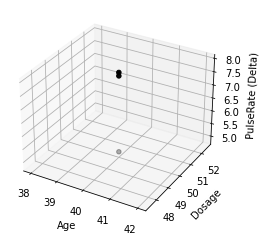

In [23]:
if __name__ == "__main__":
    main()